<a href="https://www.kaggle.com/code/mateuscpinheiro/analisando-fiis?scriptVersionId=161206638" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
#import matplotlib as plt
import matplotlib.pyplot as plt

import seaborn as sns
#import from ipywidgets import

# Carregamento das bases de dados
## Fundsexplorer
Dataset baixado manualmente do [Ranking do Fundsexplorer](https://www.fundsexplorer.com.br/ranking#upTo--default-fiis-table) e carregado no Kaggle.

In [2]:
fiis_class = pd.read_excel('/kaggle/input/fiis-statusinvest/fiis-fundsexplorer (cpia manual).xlsx', header=2)

#tirar valores nulos da coluna subsetor
fiis_class = fiis_class.dropna(subset='SETOR')
if fiis_class.columns[0] == 'Todos os Setores (17)':
    fiis_class = fiis_class.rename(columns={'Todos os Setores (17)' : 'FUNDOS'})

fiis_class

,FUNDOS,SETOR,PREÇO ATUAL (R$),LIQUIDEZ DIÁRIA (R$),P/VP,ÚLTIMO DIVIDENDO,DIVIDEND YIELD,DY (3M) ACUMULADO,DY (6M) ACUMULADO,DY (12M) ACUMULADO,...,DY PATRIMONIAL,VARIAÇÃO PATRIMONIAL,RENTAB. PATR. PERÍODO,RENTAB. PATR. ACUMULADA,QUANT. ATIVOS,VOLATILIDADE,NUM. COTISTAS,TAX. GESTÃO,TAX. PERFORMANCE,TAX. ADMINISTRAÇÃO
0,AAZQ11,INDEFINIDO,9.31,964050.32,0.97,0.12,0.0132,0.0395,0.0779,0.1605,...,0.0124,0.0000,0.0000,0.0000,0,13.79,23739,NaN,NaN,NaN
1,ABCP11,SHOPPINGS,74.98,72657.57,0.74,0.65,0.0093,0.0266,0.0495,0.0939,...,0.0064,0.1055,0.1126,0.1918,1,15.04,17205,NaN,NaN,NaN
2,AFHI11,PAPÉIS,98.41,929756.76,1.02,1.00,0.0100,0.0309,0.0630,0.1310,...,0.0104,0.0112,0.0217,0.0858,0,8.18,27831,NaN,NaN,NaN
3,AGRX11,OUTROS,10.83,517369.68,NaN,0.15,0.0137,0.0413,0.0790,0.1737,...,NaN,NaN,NaN,NaN,0,15.52,0,NaN,NaN,NaN
4,AIEC11,LAJES CORPORATIVAS,56.26,794587.86,0.68,1.33,0.0233,0.0504,0.0837,0.1468,...,0.0160,-0.1108,-0.0966,-0.0861,2,17.09,16789,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,XTED11,LAJES CORPORATIVAS,8.82,17641.88,0.68,11.16,NaN,NaN,NaN,NaN,...,0.0000,-0.0036,-0.0036,-0.0345,1,29.46,4098,NaN,NaN,NaN
442,YUFI11,FUNDO DE DESENVOLVIMENTO,79.99,255.00,0.78,0.39,0.0000,0.0000,0.0037,0.0109,...,NaN,NaN,NaN,NaN,28,192.75,60,NaN,NaN,NaN
443,YUFI11B,INDEFINIDO,NaN,NaN,NaN,0.63,0.0000,0.0000,0.0000,0.0000,...,0.0060,-0.0001,0.0059,0.0632,0,NaN,0,NaN,NaN,NaN
444,ZAVI11,INDEFINIDO,131.29,365641.27,0.98,1.24,0.0099,0.0284,0.0555,0.1070,...,NaN,NaN,NaN,NaN,9,19.28,5007,NaN,NaN,NaN


## Transformando os números percentuais 

In [3]:
fiis_class.iloc[:,6:17] = fiis_class.iloc[:,6:17]*100
fiis_class.iloc[:,6:18]

,DIVIDEND YIELD,DY (3M) ACUMULADO,DY (6M) ACUMULADO,DY (12M) ACUMULADO,DY (3M) MÉDIA,DY (6M) MÉDIA,DY (12M) MÉDIA,DY ANO,VARIAÇÃO PREÇO,RENTAB. PERÍODO,RENTAB. ACUMULADA,PATRIMÔNIO LÍQUIDO
0,1.32,3.95,7.79,16.05,1.32,1.30,1.46,16.05,0.00,1.32,9.13,2.318222e+08
1,0.93,2.66,4.95,9.39,0.89,0.83,0.78,9.39,0.52,1.45,3.59,4.780105e+08
2,1.00,3.09,6.30,13.10,1.03,1.05,1.09,13.10,2.32,3.34,17.16,3.210416e+08
3,1.37,4.13,7.90,17.37,1.38,1.32,1.45,17.37,0.00,1.37,27.17,NaN
4,2.33,5.04,8.37,14.68,1.68,1.40,1.22,14.68,1.91,4.29,-4.93,4.012162e+08
...,...,...,...,...,...,...,...,...,...,...,...,...
441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.737820e+07
442,0.00,0.00,0.37,1.09,0.00,0.06,0.09,1.09,0.00,0.00,NaN,5.038388e+07
443,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN
444,0.99,2.84,5.55,10.70,0.95,0.93,0.89,10.70,-1.51,-0.53,6.96,1.569596e+08


## Transformando patrimônio em milhões

In [4]:
fiis_class['PATRIMÔNIO LÍQUIDO'] = (fiis_class['PATRIMÔNIO LÍQUIDO']/1000000).round(decimals=2)

fiis_class[['FUNDOS','PATRIMÔNIO LÍQUIDO']]

,FUNDOS,PATRIMÔNIO LÍQUIDO
0,AAZQ11,231.82
1,ABCP11,478.01
2,AFHI11,321.04
3,AGRX11,NaN
4,AIEC11,401.22
...,...,...
441,XTED11,67.38
442,YUFI11,50.38
443,YUFI11B,NaN
444,ZAVI11,156.96


## Statusinvest
Outra base a ser carregada é a [busca avançada de FIIs do Statusinvest](https://statusinvest.com.br/fundos-imobiliarios/busca-avancada):

In [5]:
fiis_status = pd.read_csv('/kaggle/input/fiis-statusinvest/fiis-statusinvest-busca-avancada.csv', sep = ';')
fiis_status

,TICKER,PRECO,ULTIMO DIVIDENDO,DY,VALOR PATRIMONIAL COTA,P/VP,LIQUIDEZ MEDIA DIARIA,PERCENTUAL EM CAIXA,CAGR DIVIDENDOS 3 ANOS,CAGR VALOR CORA 3 ANOS,PATRIMONIO,N COTISTAS,GESTAO,N COTAS
0,ABCP11,"74,98","0,650000","8,60","101,51","0,74","72.657,57","1,63","8,43","-0,67","478.010.469,38","17.205,00",Passiva,"4.709.082,00"
1,AFHI11,"98,41","1,000000","12,88","96,03","1,02","929.756,76","4,79",NaN,NaN,"321.041.569,91","27.831,00",Ativa,"3.343.095,00"
2,AIEC11,"56,26","1,330000","16,30","83,15","0,68","794.587,86","3,08","8,80","-15,57","401.216.234,32","16.789,00",Ativa,"4.824.987,00"
3,AJFI11,"9,58","0,070000","0,73","9,60","1,00","1.071.310,00","7,15",NaN,NaN,"303.522.331,87","6.735,00",Ativa,"31.625.978,00"
4,ALMI11,"678,00","0,371133","0,00","2.154,48","0,31","86.115,47","3,21",NaN,"-20,51","239.528.331,03","2.239,00",Passiva,"111.177,00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,XPSF11,"8,49","0,075000","10,71","8,66","0,98","625.858,41","3,92","0,90","-3,88","375.011.611,85","62.335,00",Ativa,"43.302.140,00"
505,YEES11,"0,00",NaN,"0,00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"300.000,00"
506,YUFI11,"79,99","0,389271","3,49","102,27","0,78","255,00","2,33",NaN,NaN,"50.383.877,76","60,00",Ativa,"492.650,00"
507,ZAVI11,"131,29","1,240000","10,31","133,77","0,98","365.641,27","2,57",NaN,NaN,"156.959.628,57","5.007,00",Ativa,"1.173.322,00"


In [6]:
fiis_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   TICKER                   509 non-null    object
 1   PRECO                    509 non-null    object
 2   ULTIMO DIVIDENDO         423 non-null    object
 3   DY                       509 non-null    object
 4   VALOR PATRIMONIAL COTA   482 non-null    object
 5   P/VP                     393 non-null    object
 6   LIQUIDEZ MEDIA DIARIA    359 non-null    object
 7   PERCENTUAL EM CAIXA      468 non-null    object
 8   CAGR DIVIDENDOS 3 ANOS   212 non-null    object
 9    CAGR VALOR CORA 3 ANOS  231 non-null    object
 10  PATRIMONIO               482 non-null    object
 11  N COTISTAS               482 non-null    object
 12  GESTAO                   475 non-null    object
 13   N COTAS                 509 non-null    object
dtypes: object(14)
memory usage: 55.8+ KB


### Formatação dos números no DataFrame statusinvest

Nota-se que os os dados estão em formato brasileiro, pontos (.) separando casas de milhar e vírgulas (,) separando as casas decimais.
Será feito o ajuste de imediato

In [7]:
fiis_status = fiis_status.apply(lambda x: x.str.replace('.', ''))
fiis_status = fiis_status.apply(lambda x: x.str.replace(',', '.'))
colunas = fiis_status.columns.to_list()
colunas.remove('TICKER')
colunas.remove('GESTAO')

for x in colunas:
   fiis_status[x] = pd.to_numeric(fiis_status[x], downcast="float")

print(fiis_status.info())
fiis_status.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TICKER                   509 non-null    object 
 1   PRECO                    509 non-null    float64
 2   ULTIMO DIVIDENDO         423 non-null    float32
 3   DY                       509 non-null    float32
 4   VALOR PATRIMONIAL COTA   482 non-null    float64
 5   P/VP                     393 non-null    float32
 6   LIQUIDEZ MEDIA DIARIA    359 non-null    float64
 7   PERCENTUAL EM CAIXA      468 non-null    float32
 8   CAGR DIVIDENDOS 3 ANOS   212 non-null    float32
 9    CAGR VALOR CORA 3 ANOS  231 non-null    float32
 10  PATRIMONIO               482 non-null    float64
 11  N COTISTAS               482 non-null    float32
 12  GESTAO                   475 non-null    object 
 13   N COTAS                 509 non-null    float64
dtypes: float32(7), float64(5),

/tmp/ipykernel_20/927534397.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  fiis_status = fiis_status.apply(lambda x: x.str.replace('.', ''))


,TICKER,PRECO,ULTIMO DIVIDENDO,DY,VALOR PATRIMONIAL COTA,P/VP,LIQUIDEZ MEDIA DIARIA,PERCENTUAL EM CAIXA,CAGR DIVIDENDOS 3 ANOS,CAGR VALOR CORA 3 ANOS,PATRIMONIO,N COTISTAS,GESTAO,N COTAS
0,ABCP11,74.98,0.650000,8.600000,101.51,0.74,72657.57,1.63,8.43,-0.67,4.780105e+08,17205.0,Passiva,4709082.0
1,AFHI11,98.41,1.000000,12.880000,96.03,1.02,929756.76,4.79,NaN,NaN,3.210416e+08,27831.0,Ativa,3343095.0
2,AIEC11,56.26,1.330000,16.299999,83.15,0.68,794587.86,3.08,8.80,-15.57,4.012162e+08,16789.0,Ativa,4824987.0
3,AJFI11,9.58,0.070000,0.730000,9.60,1.00,1071310.00,7.15,NaN,NaN,3.035223e+08,6735.0,Ativa,31625978.0
4,ALMI11,678.00,0.371133,0.000000,2154.48,0.31,86115.47,3.21,NaN,-20.51,2.395283e+08,2239.0,Passiva,111177.0


Para padronizar com a base do Fundsexplorer, vamos transformar o patrimônio em milhões

In [8]:
fiis_status['PATRIMONIO'] = (fiis_status['PATRIMONIO']/1000000).round(decimals=2)
fiis_status[['TICKER','PATRIMONIO']]

,TICKER,PATRIMONIO
0,ABCP11,478.01
1,AFHI11,321.04
2,AIEC11,401.22
3,AJFI11,303.52
4,ALMI11,239.53
...,...,...
504,XPSF11,375.01
505,YEES11,NaN
506,YUFI11,50.38
507,ZAVI11,156.96


As colunas desta tabela são:

In [9]:
fiis_status.columns

Index(['TICKER', 'PRECO', 'ULTIMO DIVIDENDO', 'DY', 'VALOR PATRIMONIAL COTA',
       'P/VP', 'LIQUIDEZ MEDIA DIARIA', 'PERCENTUAL EM CAIXA',
       'CAGR DIVIDENDOS 3 ANOS', ' CAGR VALOR CORA 3 ANOS', 'PATRIMONIO',
       'N COTISTAS', 'GESTAO', ' N COTAS'],
      dtype='object')

Comparando a quantidade de fundos imobiliários em cada tabela carregada.

In [10]:
print(f'Quantidade de fundos carregados: \nFunds Explorer: {fiis_class.shape[0]} \n  Statusinvest: {fiis_status.shape[0]}')

Quantidade de fundos carregados: 
Funds Explorer: 434 
  Statusinvest: 509


## IFIX

Notou-se que algumas amostras não têm dados e é preciso algum critério para classificar se o FII é descartável ou não.

Portanto, em caso de dúvida, utilizarei como referência os fundos que compõem o [Índice de Fundos de Investimentos Imobiliários (IFIX B3)]('https://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-de-segmentos-e-setoriais/indice-de-fundos-de-investimentos-imobiliarios-ifix.htm') como importantes de se manter e os demais quando descartáveis.


In [11]:
ifix = pd.read_csv('/kaggle/input/fiis-statusinvest/IFIX.csv', sep=';', header=1, encoding='latin-1')

#realocando as colunas que foram carregadas deslocadas para frente
colunas = list(ifix.columns)
colunas.pop(0)
ifix.drop('Part. (%)', axis='columns', inplace=True)
ifix.columns=colunas

#excluindo as linhas sem dados
ifix = ifix.dropna()

ifix = ifix.apply(lambda x: x.str.replace(',', '.'))

#selecionando apenas a colunas relevante

ifix = ifix['Part. (%)']
ifix = ifix.rename('ifix')
ifix= pd.to_numeric(ifix, errors= 'coerce')
ifix

CACR11    0.317
AFHI11    0.341
ALZR11    0.920
RZAT11    0.278
ARRI11    0.094
          ...  
XPIN11    0.471
XPLG11    2.574
XPML11    3.448
XPPR11    0.122
XPSF11    0.290
Name: ifix, Length: 108, dtype: float64

In [12]:
ifix.sort_values(ascending=False)

KNIP11    6.113
KNCR11    4.654
HGLG11    4.384
XPML11    3.448
KNRI11    3.178
          ...  
BLMG11    0.119
SADI11    0.111
VSLH11    0.097
ARRI11    0.094
TORD11    0.059
Name: ifix, Length: 108, dtype: float64

# Fusão das tabelas

Primeiramente, fundiremos as duas principais tabelas, do funds explorer e do status invest:

In [13]:
fiis_temp = fiis_status.merge(right = fiis_class, 
                         how = 'outer',
                        left_on = fiis_status['TICKER'],
                        right_on = fiis_class['FUNDOS'])
fiis_temp = fiis_temp.rename(columns={'key_0': 'ticker'})
fiis_temp[['ticker','TICKER','FUNDOS']]

,ticker,TICKER,FUNDOS
0,ABCP11,ABCP11,ABCP11
1,AFHI11,AFHI11,AFHI11
2,AIEC11,AIEC11,AIEC11
3,AJFI11,AJFI11,AJFI11
4,ALMI11,ALMI11,ALMI11
...,...,...,...
557,XPCA11,NaN,XPCA11
558,XPHT11,NaN,XPHT11
559,XPID11,NaN,XPID11
560,XTED11,NaN,XTED11


Analisando os fundos listados exclusivamente na tabela do fundsexplorer:

In [14]:
print(f'Quantidade de fundos carregados: \n         Total: {fiis_temp.shape[0]}\nFunds Explorer: {fiis_status.shape[0]} -\n                ____\n     Diferença: {fiis_temp.shape[0]-fiis_status.shape[0]}')

Quantidade de fundos carregados: 
         Total: 562
Funds Explorer: 509 -
                ____
     Diferença: 53


Agora juntando a tabela resultante da fusão com o percentual no IFIX.

In [15]:
fiis = fiis_temp.merge(right = ifix, 
                         how = 'outer',
                        left_on = fiis_temp['ticker'],
                        right_on = ifix.index)

fiis[['key_0','ifix']].dropna()

,key_0,ifix
1,AFHI11,0.341
2,AIEC11,0.215
7,ALZR11,0.920
16,ARRI11,0.094
24,BARI11,0.309
...,...,...
500,XPIN11,0.471
501,XPLG11,2.574
502,XPML11,3.448
503,XPPR11,0.122


## key_0, TICKER e FUNDOS

In [16]:
fiis[['key_0','TICKER','FUNDOS']].query('key_0 != TICKER')

,key_0,TICKER,FUNDOS
509,AAZQ11,NaN,AAZQ11
510,AGRX11,NaN,AGRX11
511,ARCT11,NaN,ARCT11
512,BBGO11,NaN,BBGO11
513,BBPO11,NaN,BBPO11
514,BDIF11,NaN,BDIF11
515,BIDB11,NaN,BIDB11
516,BODB11,NaN,BODB11
517,BTAG11,NaN,BTAG11
518,CDII11,NaN,CDII11


Todas as colunas `TICKER` e `FUNDOS` são iguais à réplica da `key_0` ou NaN, então podem ser descartadas.

In [17]:
fiis.pop('TICKER')
fiis.pop('FUNDOS')
fiis.pop('ticker')
fiis=fiis.set_index(fiis.key_0) # inplace substitui a dataframe atual
print(fiis.shape)
fiis.pop('key_0')


(562, 44)


key_0
ABCP11      ABCP11
AFHI11      AFHI11
AIEC11      AIEC11
AJFI11      AJFI11
ALMI11      ALMI11
            ...   
XPCA11      XPCA11
XPHT11      XPHT11
XPID11      XPID11
XTED11      XTED11
YUFI11B    YUFI11B
Name: key_0, Length: 562, dtype: object

Renomeando o índice para 'ticker'

In [18]:
fiis.index.names=['ticker']
fiis.sample(n=20)


,PRECO,ULTIMO DIVIDENDO,DY,VALOR PATRIMONIAL COTA,P/VP_x,LIQUIDEZ MEDIA DIARIA,PERCENTUAL EM CAIXA,CAGR DIVIDENDOS 3 ANOS,CAGR VALOR CORA 3 ANOS,PATRIMONIO,...,VARIAÇÃO PATRIMONIAL,RENTAB. PATR. PERÍODO,RENTAB. PATR. ACUMULADA,QUANT. ATIVOS,VOLATILIDADE,NUM. COTISTAS,TAX. GESTÃO,TAX. PERFORMANCE,TAX. ADMINISTRAÇÃO,ifix
ticker,,,,,,,,,,,,,,,,,,,,,
RBRL11,87.59,0.720000,9.13,100.89,0.87,1014368.14,1.230000,-1.92,-6.700000,674.63,...,-0.0594,-0.0527,0.0244,6.0,18.26,13891.0,NaN,NaN,NaN,0.463
MMPD11,0.00,1.066940,0.00,111.74,NaN,NaN,3.580000,NaN,NaN,59.22,...,NaN,NaN,NaN,0.0,NaN,55.0,NaN,NaN,NaN,NaN
RCRB11,158.25,0.930000,5.86,205.62,0.77,1407153.92,2.380000,-2.00,-2.010000,758.90,...,0.1819,0.1864,0.3023,9.0,24.86,31468.0,NaN,NaN,NaN,0.462
MGIM11,101.50,0.176173,0.00,98.41,1.03,NaN,101.040001,NaN,NaN,24.34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VGIP11,90.60,0.760000,11.71,93.66,0.97,1649452.81,1.020000,-8.70,-5.760000,1103.96,...,0.0356,0.0440,0.1349,0.0,13.90,89389.0,NaN,NaN,NaN,0.845
IAAG11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0000,0.0000,0.0000,0.0,10.08,1563.0,NaN,NaN,NaN,NaN
SPMO11,120.00,0.430000,0.00,153.28,0.78,166638.78,0.010000,NaN,NaN,277.29,...,NaN,NaN,NaN,0.0,0.42,8.0,NaN,NaN,NaN,NaN
ATSA11,56.49,0.050000,0.18,75.88,0.74,1960.43,1.020000,1.98,-20.629999,132.87,...,0.0016,0.0022,-0.0899,1.0,27.52,294.0,NaN,NaN,NaN,NaN
BIDB11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,8.96,0.0,NaN,NaN,NaN,NaN


# Tratamento das colunas

Pirmeiramente, avaliaremos as colunas do dataset.

As colunas com nomes originais são:

In [19]:
colunas = fiis.columns
colunas

Index(['PRECO', 'ULTIMO DIVIDENDO', 'DY', 'VALOR PATRIMONIAL COTA', 'P/VP_x',
       'LIQUIDEZ MEDIA DIARIA', 'PERCENTUAL EM CAIXA',
       'CAGR DIVIDENDOS 3 ANOS', ' CAGR VALOR CORA 3 ANOS', 'PATRIMONIO',
       'N COTISTAS', 'GESTAO', ' N COTAS', 'SETOR', 'PREÇO ATUAL (R$)',
       'LIQUIDEZ DIÁRIA (R$)', 'P/VP_y', 'ÚLTIMO DIVIDENDO', 'DIVIDEND YIELD',
       'DY (3M) ACUMULADO', 'DY (6M) ACUMULADO', 'DY (12M) ACUMULADO',
       'DY (3M) MÉDIA', 'DY (6M) MÉDIA', 'DY (12M) MÉDIA', 'DY ANO',
       'VARIAÇÃO PREÇO', 'RENTAB. PERÍODO', 'RENTAB. ACUMULADA',
       'PATRIMÔNIO LÍQUIDO', 'VPA', 'P/VPA', 'DY PATRIMONIAL',
       'VARIAÇÃO PATRIMONIAL', 'RENTAB. PATR. PERÍODO',
       'RENTAB. PATR. ACUMULADA', 'QUANT. ATIVOS', 'VOLATILIDADE',
       'NUM. COTISTAS', 'TAX. GESTÃO', 'TAX. PERFORMANCE',
       'TAX. ADMINISTRAÇÃO', 'ifix'],
      dtype='object')

## Renomeando as colunas

Agora renomearei as colunas com um nome mais amigável para o código:

In [20]:
colunas = {'PRECO': 'preco_status', 
           'ULTIMO DIVIDENDO': 'dividendo_status', 
           'DY': 'dy_status', 
           'VALOR PATRIMONIAL COTA': 'pva_status', 
           'P/VP_x': 'pvp_status',
           'LIQUIDEZ MEDIA DIARIA': 'liquidez_diaria', 
           'PERCENTUAL EM CAIXA': 'perc_caixa',
           'CAGR DIVIDENDOS 3 ANOS': 'cagr_div_3a', 
           ' CAGR VALOR CORA 3 ANOS': 'cagr_valor_3a', 
           'PATRIMONIO': 'patr_milhoes_status',
           'N COTISTAS': 'n_cotistas_status', 
           'GESTAO': 'gestao',
           ' N COTAS': 'n_cotas_status',
          'SETOR': 'subsetor',
          'PREÇO ATUAL (R$)': 'preco_funds', 
          'LIQUIDEZ DIÁRIA (R$)': 'liq_diaria_funds', 
          'P/VP': 'pvp_funds',
          'ÚLTIMO DIVIDENDO': 'ult_dividendo_funds', 
          'DIVIDEND YIELD': 'dy_funds', 
          'DY (3M) ACUMULADO': 'dy_3m_acum',
          'DY (6M) ACUMULADO': 'dy_6m_acum', 
          'DY (12M) ACUMULADO': 'dy_12m_acum', 
          'DY (3M) MÉDIA': 'dy_3m_media',
          'DY (6M) MÉDIA': 'dy_6m_media', 
          'DY (12M) MÉDIA': 'dy_12m_media', 
          'DY ANO':'dy_ano_funds', 
          'VARIAÇÃO PREÇO': 'var_preco',
          'RENTAB. PERÍODO': 'rentabilidade', 
          'RENTAB. ACUMULADA': 'rentabilidade_acum', 
          'PATRIMÔNIO LÍQUIDO': 'patr_milhoes_funds', 
          'VPA': 'vpa_funds',
          'P/VPA': 'pvpa_funds', 
          'DY PATRIMONIAL': 'dy_patr', 
          'VARIAÇÃO PATRIMONIAL': 'var_patr',
          'RENTAB. PATR. PERÍODO': 'rentab_patr', 
          'RENTAB. PATR. ACUMULADA': 'rentab_patr_acum', 
          'VACÂNCIA FÍSICA': 'vac_fisica',
          'VACÂNCIA FINANCEIRA': 'vac_fincanceira', 
          'QUANT. ATIVOS': 'quant_ativos',
          'ifix': 'ifix',
          'VOLATILIDADE': 'volatilidade',
          'NUM. COTISTAS': 'n_cotistas_funds'}


In [21]:
fiis.rename(columns=colunas,inplace=True)
fiis.head()

,preco_status,dividendo_status,dy_status,pva_status,pvp_status,liquidez_diaria,perc_caixa,cagr_div_3a,cagr_valor_3a,patr_milhoes_status,...,var_patr,rentab_patr,rentab_patr_acum,quant_ativos,volatilidade,n_cotistas_funds,TAX. GESTÃO,TAX. PERFORMANCE,TAX. ADMINISTRAÇÃO,ifix
ticker,,,,,,,,,,,,,,,,,,,,,
ABCP11,74.98,0.650000,8.600000,101.51,0.74,72657.57,1.63,8.43,-0.67,478.01,...,0.1055,0.1126,0.1918,1.0,15.04,17205.0,NaN,NaN,NaN,NaN
AFHI11,98.41,1.000000,12.880000,96.03,1.02,929756.76,4.79,NaN,NaN,321.04,...,0.0112,0.0217,0.0858,0.0,8.18,27831.0,NaN,NaN,NaN,0.341
AIEC11,56.26,1.330000,16.299999,83.15,0.68,794587.86,3.08,8.80,-15.57,401.22,...,-0.1108,-0.0966,-0.0861,2.0,17.09,16789.0,NaN,NaN,NaN,0.215
AJFI11,9.58,0.070000,0.730000,9.60,1.00,1071310.00,7.15,NaN,NaN,303.52,...,NaN,NaN,NaN,0.0,4.40,6735.0,NaN,NaN,NaN,NaN
ALMI11,678.00,0.371133,0.000000,2154.48,0.31,86115.47,3.21,NaN,-20.51,239.53,...,-0.0005,-0.0005,0.0090,1.0,34.47,2239.0,NaN,NaN,NaN,NaN


Excluindo as colunas que não possuem dados não nulos

In [22]:
fiis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 562 entries, ABCP11 to YUFI11B
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   preco_status         509 non-null    float64
 1   dividendo_status     423 non-null    float32
 2   dy_status            509 non-null    float32
 3   pva_status           482 non-null    float64
 4   pvp_status           393 non-null    float32
 5   liquidez_diaria      359 non-null    float64
 6   perc_caixa           468 non-null    float32
 7   cagr_div_3a          212 non-null    float32
 8   cagr_valor_3a        231 non-null    float32
 9   patr_milhoes_status  482 non-null    float64
 10  n_cotistas_status    482 non-null    float32
 11  gestao               475 non-null    object 
 12  n_cotas_status       509 non-null    float64
 13  subsetor             434 non-null    object 
 14  preco_funds          400 non-null    float64
 15  liq_diaria_funds     392 non-null   

In [23]:
fiis.pop("TAX. GESTÃO")
fiis.pop("TAX. PERFORMANCE")
fiis.pop("TAX. ADMINISTRAÇÃO")
fiis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 562 entries, ABCP11 to YUFI11B
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   preco_status         509 non-null    float64
 1   dividendo_status     423 non-null    float32
 2   dy_status            509 non-null    float32
 3   pva_status           482 non-null    float64
 4   pvp_status           393 non-null    float32
 5   liquidez_diaria      359 non-null    float64
 6   perc_caixa           468 non-null    float32
 7   cagr_div_3a          212 non-null    float32
 8   cagr_valor_3a        231 non-null    float32
 9   patr_milhoes_status  482 non-null    float64
 10  n_cotistas_status    482 non-null    float32
 11  gestao               475 non-null    object 
 12  n_cotas_status       509 non-null    float64
 13  subsetor             434 non-null    object 
 14  preco_funds          400 non-null    float64
 15  liq_diaria_funds     392 non-null   

## Colunas de preço

As duas colunas vêm de bases de dados diferentes:
* `preco_status` do statusinvest e 
* `preco_funds` do fundsexplorer

In [24]:
fiis[['preco_status','preco_funds','ifix']] = fiis[['preco_status','preco_funds','ifix']].fillna(0)
fiis['preco'] = fiis[['preco_status','preco_funds']].max(axis=1)
print(f'FIIs com preço R$ 0.00: {fiis.preco.where(fiis.preco == 0).count()}')
fiis[['preco','preco_status','preco_funds','ifix','liq_diaria_funds']].sample(n=15)


FIIs com preço R$ 0.00: 110


,preco,preco_status,preco_funds,ifix,liq_diaria_funds
ticker,,,,,
BMLC11,104.99,104.99,104.99,0.000,379056.97
VLIQ11,0.00,0.00,0.00,0.000,NaN
VGIR11,9.71,9.71,9.71,0.793,4186808.89
MBRF11,0.00,0.00,0.00,0.000,NaN
TSNM11,0.00,0.00,0.00,0.000,NaN
VCRR11,70.73,70.73,70.73,0.000,275439.30
PLOG11,66.71,0.00,66.71,0.000,70165.04
BRSE11,0.00,0.00,0.00,0.000,NaN
CYCR11,9.74,9.74,9.74,0.126,368661.35


Portanto as colunas `preco_status` e `preco_funds` podem ser destacadas da base de dados.

In [25]:
fiis.pop('preco_status')
fiis.pop('preco_funds')
fiis.columns

Index(['dividendo_status', 'dy_status', 'pva_status', 'pvp_status',
       'liquidez_diaria', 'perc_caixa', 'cagr_div_3a', 'cagr_valor_3a',
       'patr_milhoes_status', 'n_cotistas_status', 'gestao', 'n_cotas_status',
       'subsetor', 'liq_diaria_funds', 'P/VP_y', 'ult_dividendo_funds',
       'dy_funds', 'dy_3m_acum', 'dy_6m_acum', 'dy_12m_acum', 'dy_3m_media',
       'dy_6m_media', 'dy_12m_media', 'dy_ano_funds', 'var_preco',
       'rentabilidade', 'rentabilidade_acum', 'patr_milhoes_funds',
       'vpa_funds', 'pvpa_funds', 'dy_patr', 'var_patr', 'rentab_patr',
       'rentab_patr_acum', 'quant_ativos', 'volatilidade', 'n_cotistas_funds',
       'ifix', 'preco'],
      dtype='object')

Todos os fiis sem dados de preço (0.00) não compõem o IFIX, conforme mostrado abaixo.

In [26]:

fiis[['preco','ifix']][(fiis.preco==0) & (fiis.ifix>0)].shape


(0, 2)

Foi verificado que os FIIs sem quantidade de cotas e com preço R$ 0,00 já deixaram de existir.

In [27]:
fiis = fiis[(fiis.n_cotas_status>0) | (fiis.preco>0)]


Observando os fundos que têm valores diferentes entre as fontes Fundsexplorer e Statusinvest:

In [28]:
fiis['patrimonio_milhoes'] = np.where(pd.isna(fiis.patr_milhoes_funds), fiis.patr_milhoes_status, fiis.patr_milhoes_funds)

fiis[['patrimonio_milhoes','patr_milhoes_funds','patr_milhoes_status']][(fiis.patr_milhoes_status != fiis.patr_milhoes_funds) & (pd.notna(fiis.patr_milhoes_status) & pd.notna(fiis.patr_milhoes_funds))]

,patrimonio_milhoes,patr_milhoes_funds,patr_milhoes_status
ticker,,,
BREV11,113.86,113.86,0.0
KINP11,26.41,26.41,0.0
LAVF11,0.12,0.12,0.0
VSEC11,0.18,0.18,0.0


E os Fundos onde não há resultado em ambas fontes:

In [29]:
fiis[['patrimonio_milhoes','patr_milhoes_funds','patr_milhoes_status']][fiis.patrimonio_milhoes==0]

,patrimonio_milhoes,patr_milhoes_funds,patr_milhoes_status
ticker,,,
FVBI11,0.0,NaN,0.0
HBTT11,0.0,NaN,0.0
LATR11B,0.0,NaN,0.0
RBCB11,0.0,NaN,0.0
TORM13,0.0,NaN,0.0
TOUR11,0.0,NaN,0.0


In [30]:
fiis.pop('patr_milhoes_funds')
fiis.pop('patr_milhoes_status')


ticker
ABCP11    478.01
AFHI11    321.04
AIEC11    401.22
AJFI11    303.52
ALMI11    239.53
           ...  
VGIA11       NaN
XPCA11       NaN
XPHT11       NaN
XPID11       NaN
XTED11       NaN
Name: patr_milhoes_status, Length: 544, dtype: float64

## Avaliando os dados das colunas dividend yield

In [31]:
fiis = fiis[(fiis.dy_status>0) | fiis.dy_12m_acum>0]


In [32]:
fiis.dy_status = np.where(pd.isna(fiis.dy_status), fiis.dy_12m_acum, fiis.dy_status)
fiis = fiis.rename(columns={'dy_status':'dy'})
fiis.pop('dy_12m_acum')
fiis


,dividendo_status,dy,pva_status,pvp_status,liquidez_diaria,perc_caixa,cagr_div_3a,cagr_valor_3a,n_cotistas_status,gestao,...,dy_patr,var_patr,rentab_patr,rentab_patr_acum,quant_ativos,volatilidade,n_cotistas_funds,ifix,preco,patrimonio_milhoes
ticker,,,,,,,,,,,,,,,,,,,,,
ABCP11,0.65000,8.600000,101.51,0.74,72657.57,1.63,8.43,-0.67,17205.0,Passiva,...,0.0064,0.1055,0.1126,0.1918,1.0,15.04,17205.0,0.000,74.98,478.01
AFHI11,1.00000,12.880000,96.03,1.02,929756.76,4.79,NaN,NaN,27831.0,Ativa,...,0.0104,0.0112,0.0217,0.0858,0.0,8.18,27831.0,0.341,98.41,321.04
AIEC11,1.33000,16.299999,83.15,0.68,794587.86,3.08,8.80,-15.57,16789.0,Ativa,...,0.0160,-0.1108,-0.0966,-0.0861,2.0,17.09,16789.0,0.215,56.26,401.22
AJFI11,0.07000,0.730000,9.60,1.00,1071310.00,7.15,NaN,NaN,6735.0,Ativa,...,NaN,NaN,NaN,NaN,0.0,4.40,6735.0,0.000,9.58,303.52
ALZM11,0.10886,11.940000,8.52,1.01,239897.19,7.80,NaN,NaN,5674.0,Ativa,...,0.0128,-0.9079,-0.9068,-0.9029,0.0,19.14,5674.0,0.000,8.64,129.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VCRA11,NaN,14.720000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0106,0.0097,0.0205,0.0354,0.0,16.08,9171.0,0.000,91.75,474.93
VGIA11,NaN,16.130000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0130,0.0012,0.0142,0.0968,0.0,14.41,163632.0,0.000,8.99,825.03
XPCA11,NaN,15.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0126,0.0010,0.0136,0.1400,0.0,11.48,94546.0,0.000,9.54,432.33


In [33]:
fiis.columns

Index(['dividendo_status', 'dy', 'pva_status', 'pvp_status', 'liquidez_diaria',
       'perc_caixa', 'cagr_div_3a', 'cagr_valor_3a', 'n_cotistas_status',
       'gestao', 'n_cotas_status', 'subsetor', 'liq_diaria_funds', 'P/VP_y',
       'ult_dividendo_funds', 'dy_funds', 'dy_3m_acum', 'dy_6m_acum',
       'dy_3m_media', 'dy_6m_media', 'dy_12m_media', 'dy_ano_funds',
       'var_preco', 'rentabilidade', 'rentabilidade_acum', 'vpa_funds',
       'pvpa_funds', 'dy_patr', 'var_patr', 'rentab_patr', 'rentab_patr_acum',
       'quant_ativos', 'volatilidade', 'n_cotistas_funds', 'ifix', 'preco',
       'patrimonio_milhoes'],
      dtype='object')

## Unificando colunas de Preço por Valor Patrimonial (PVP)

In [34]:
fiis[['pvp_status','P/VP_y']]
fiis.pvp_status = np.where(pd.isna(fiis.pvp_status), fiis["P/VP_y"], fiis.pvp_status)
fiis = fiis.rename(columns={'pvp_status':'pvp'})
fiis.pop('P/VP_y')
fiis


,dividendo_status,dy,pva_status,pvp,liquidez_diaria,perc_caixa,cagr_div_3a,cagr_valor_3a,n_cotistas_status,gestao,...,dy_patr,var_patr,rentab_patr,rentab_patr_acum,quant_ativos,volatilidade,n_cotistas_funds,ifix,preco,patrimonio_milhoes
ticker,,,,,,,,,,,,,,,,,,,,,
ABCP11,0.65000,8.600000,101.51,0.74,72657.57,1.63,8.43,-0.67,17205.0,Passiva,...,0.0064,0.1055,0.1126,0.1918,1.0,15.04,17205.0,0.000,74.98,478.01
AFHI11,1.00000,12.880000,96.03,1.02,929756.76,4.79,NaN,NaN,27831.0,Ativa,...,0.0104,0.0112,0.0217,0.0858,0.0,8.18,27831.0,0.341,98.41,321.04
AIEC11,1.33000,16.299999,83.15,0.68,794587.86,3.08,8.80,-15.57,16789.0,Ativa,...,0.0160,-0.1108,-0.0966,-0.0861,2.0,17.09,16789.0,0.215,56.26,401.22
AJFI11,0.07000,0.730000,9.60,1.00,1071310.00,7.15,NaN,NaN,6735.0,Ativa,...,NaN,NaN,NaN,NaN,0.0,4.40,6735.0,0.000,9.58,303.52
ALZM11,0.10886,11.940000,8.52,1.01,239897.19,7.80,NaN,NaN,5674.0,Ativa,...,0.0128,-0.9079,-0.9068,-0.9029,0.0,19.14,5674.0,0.000,8.64,129.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VCRA11,NaN,14.720000,NaN,0.89,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0106,0.0097,0.0205,0.0354,0.0,16.08,9171.0,0.000,91.75,474.93
VGIA11,NaN,16.130000,NaN,0.94,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0130,0.0012,0.0142,0.0968,0.0,14.41,163632.0,0.000,8.99,825.03
XPCA11,NaN,15.200000,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0126,0.0010,0.0136,0.1400,0.0,11.48,94546.0,0.000,9.54,432.33


## Colunas 'subsetor' e 'setor'

Outra observação importante é criar uma coluna de 'setor'. Se você observou, anteriormente eu substituí setor por subsetor.

Conforme o artigo da Infomoney [Fundos Imobiliários de Tijolo, papel e híbridos](https://www.infomoney.com.br/guias/fundos-imobiliarios-tijolo-papel-hibrido/), "cada um desses três tipos de FIIs têm suas peculiaridades em relação à gestão e aos tipos de ativos nos quais investem".

Na sequência, o artigo continua sobre os **Títulos de Tijolo**: 

> O fundo imobiliário de “tijolo” é o tipo de FII que investe o seu patrimônio diretamente em imóveis. Esses espaços podem estar em zonas urbanas ou rurais, e podem ter destinação comercial ou residencial – os últimos ainda não são tão comuns.
> Basicamente, o objetivo de um fundo de “tijolo” é obter retorno com a locação dos ativos imobiliários. Ou seja, a receita com aluguel dos imóveis vai para o patrimônio do fundo, e é distribuída aos investidores sob a forma de dividendos, de acordo com a quantidade de cotas que cada um possui.

São subdivididos por:

* Lajes corporativas
* Shoppings
* Galpões logísticos
* Hospitais
* Hotelaria
* Residenciais
* Agências bancárias e educação

Cada um deles é detalhado no artigo, e sugiro fortemente de ler o artigo completo.

Na sequência o artigo explica os **Fundos de Papel**:

> Também chamados de fundos de recebíveis, esses fundos são compostos por títulos relacionados ao setor imobiliário. Diferentemente dos fundos de “tijolo”, esses FIIs não possuem imóveis em seu patrimônio. Em vez disso, o gestor do fundo investe em papéis que representam direitos de créditos imobiliários, conforme veremos a seguir.
> Basicamente, os FIIs de”papel” são compostos por títulos de renda fixa como Letras de Crédito Imobiliário (LCIs), Certificados de Recebíveis Imobiliários (CRIs) e Letras Hipotecárias (LHs).

**Fundos híbridos** basicamente são compostos por ativos de papel e de tijolo.

Portanto, nos momentos seguintes vou agrupar esses numa nova coluna de Setor.

Avaliando os dados únicos de subsetor, temos (eliminando os dados vazios):

In [35]:
#alterar coluna 'subsetor' para caixa baixa
fiis.subsetor = fiis.subsetor.str.lower()

# substituir papéis por recebíveis, pois papéis será o setor
fiis['subsetor'] = fiis.subsetor.replace({'papéis': 'recebíveis'})

# lista valores únicos
fiis.subsetor.unique()

array(['shoppings', 'recebíveis', 'lajes corporativas', 'fundo de fundos',
       'misto', nan, 'imóveis residenciais',
       'imóveis industriais e logísticos', 'indefinido',
       'imóveis comerciais - outros', 'agências de bancos',
       'fundo de desenvolvimento', 'hotéis', 'educacional', 'hospitalar',
       'varejo', 'outros'], dtype=object)

In [36]:
fiis.query("subsetor=='misto'")
#fiis_class[fiis_class.ticker.str.contains('AG')] # FF (FoF), AG (agro), CR (recebíveis)
#fiis.isin()

#OLHAR INDIVIDUALMENTE OS FIIS 'outros' e 'indefinidos'

,dividendo_status,dy,pva_status,pvp,liquidez_diaria,perc_caixa,cagr_div_3a,cagr_valor_3a,n_cotistas_status,gestao,...,dy_patr,var_patr,rentab_patr,rentab_patr_acum,quant_ativos,volatilidade,n_cotistas_funds,ifix,preco,patrimonio_milhoes
ticker,,,,,,,,,,,,,,,,,,,,,
ALZR11,0.797555,8.320000,105.39,1.12,1542568.16,20.139999,8.36,-2.360000,149502.0,Ativa,...,0.0076,-0.0140,-0.0066,0.0729,13.0,11.02,149502.0,0.920,118.00,1039.17
BTSI11,0.740000,8.930000,114.50,0.85,98.67,0.060000,NaN,NaN,114.0,Ativa,...,NaN,NaN,NaN,NaN,2.0,294.91,114.0,0.000,97.50,278.22
CARE11,0.008385,0.000000,8.28,0.21,23014.76,0.020000,NaN,-21.240000,11725.0,Ativa,...,0.0010,-0.0024,-0.0014,0.0356,1.0,39.13,11725.0,0.000,1.71,296.19
CPOF11,0.750000,0.730000,111.54,0.92,3539965.80,5.580000,NaN,NaN,3.0,Ativa,...,NaN,NaN,NaN,NaN,0.0,NaN,3.0,0.000,103.00,193.50
EVBI11,0.750000,9.210000,97.50,1.01,691972.95,1.540000,NaN,NaN,1017.0,Ativa,...,0.0077,-0.0225,-0.0149,0.0639,7.0,17.17,1017.0,0.000,98.94,235.32
HGRU11,2.300000,8.820000,126.96,1.09,3444849.43,5.530000,11.92,2.650000,207752.0,Ativa,...,0.0181,0.0331,0.0518,0.1957,71.0,14.19,207752.0,2.009,138.00,2336.91
HSRE11,0.600000,6.960000,93.61,1.13,3601593.26,1.680000,3.69,NaN,241.0,Ativa,...,0.0064,-0.0253,-0.0191,0.0433,28.0,25.93,241.0,0.000,105.98,833.01
IDGR11,0.110368,3.300000,10.62,1.41,575.92,20.090000,NaN,NaN,72.0,Ativa,...,NaN,NaN,NaN,NaN,1.0,78.02,72.0,0.000,15.00,9.38
JSRE11,0.460000,7.320000,109.59,0.69,2531663.81,0.140000,-4.44,-8.800000,104781.0,Ativa,...,0.0042,-0.0299,-0.0258,0.0168,6.0,19.65,104781.0,1.246,75.85,2275.87


In [37]:
converte_subsetor = {'indefinido': 'outros', 
                     'shoppings': 'fii-tijolo', 
                     'recebíveis': 'fii-papéis', 
                     'outros': 'fiagro',
                     'lajes corporativas': 'fii-tijolo', 
                     'fundo de fundos': 'fii-papéis', 
                     'misto': 'híbrido',
                     'imóveis residenciais': 'fii-tijolo', 
                     'imóveis industriais e logísticos': 'fii-tijolo',
                     'imóveis comerciais - outros': 'fii-tijolo', 
                     'agências de bancos': 'fii-tijolo',
                     'fundo de desenvolvimento': 'fii-tijolo', 
                     'varejo': 'fii-tijolo', 
                     'fiagro': 'fiagro', 
                     'educacional': 'fii-tijolo',
                     'hospitalar': 'fii-tijolo', 
                     'hotéis': 'fii-tijolo'}

fiis['setor'] = fiis['subsetor']
fiis['setor'] = fiis['setor'].replace(converte_subsetor)

fiis[['setor','subsetor']].sample(n=20)
                                       

,setor,subsetor
ticker,,
KFOF11,fii-papéis,fundo de fundos
AJFI11,fii-tijolo,shoppings
IBCR11,fii-papéis,recebíveis
RBHY11,fii-papéis,recebíveis
TRNT11,fii-tijolo,lajes corporativas
RBRD11,fii-tijolo,varejo
SPTW11,fii-tijolo,lajes corporativas
BREV11,fii-tijolo,lajes corporativas
SFND11,NaN,NaN


Assim definimos os setores e os subsetores, que serão basilares nas análises futuras dos dados.

## Unificando colunas de número de cotistas

In [38]:
fiis['dif_n_cotistas'] = fiis.n_cotistas_funds - fiis.n_cotistas_status
fiis[["dif_n_cotistas","n_cotistas_funds","n_cotistas_status"]].sort_values(by="dif_n_cotistas", ascending=False).where(fiis.dif_n_cotistas>0)

,dif_n_cotistas,n_cotistas_funds,n_cotistas_status
ticker,,,
KINP11,1932.0,1932.0,0.0
SNLG11,319.0,3730.0,3411.0
VSEC11,64.0,64.0,0.0
PLCR11,NaN,NaN,NaN
PVBI11,NaN,NaN,NaN
...,...,...,...
VCRA11,NaN,NaN,NaN
VGIA11,NaN,NaN,NaN
XPCA11,NaN,NaN,NaN


Avaliando os Fundos que têm diferença entre as duas bases de dados(StatusInvest e Funds Explorer), alguns apresentaram diferença da quantidade de cotistas.

Analisando individualmente, os dados do StatusInvest parecem mais próximos do real (ex: KINP11 e VSEC11 parecem estar encerrados, portanto com 0 cotistas)

Desta forma, escolheu-se ficar apenas com estes dados e eliminar os demais.

In [39]:
fiis = fiis.rename(columns={"n_cotistas_status":"n_cotistas"})
fiis.pop('dif_n_cotistas')
fiis.pop('n_cotistas_funds')
fiis.columns

Index(['dividendo_status', 'dy', 'pva_status', 'pvp', 'liquidez_diaria',
       'perc_caixa', 'cagr_div_3a', 'cagr_valor_3a', 'n_cotistas', 'gestao',
       'n_cotas_status', 'subsetor', 'liq_diaria_funds', 'ult_dividendo_funds',
       'dy_funds', 'dy_3m_acum', 'dy_6m_acum', 'dy_3m_media', 'dy_6m_media',
       'dy_12m_media', 'dy_ano_funds', 'var_preco', 'rentabilidade',
       'rentabilidade_acum', 'vpa_funds', 'pvpa_funds', 'dy_patr', 'var_patr',
       'rentab_patr', 'rentab_patr_acum', 'quant_ativos', 'volatilidade',
       'ifix', 'preco', 'patrimonio_milhoes', 'setor'],
      dtype='object')

In [40]:
fii_csv = fiis.to_csv('fiis.csv')

# Análise gráfica de fundos imobiliários por setor e subsetor

## Quantidade de fundos

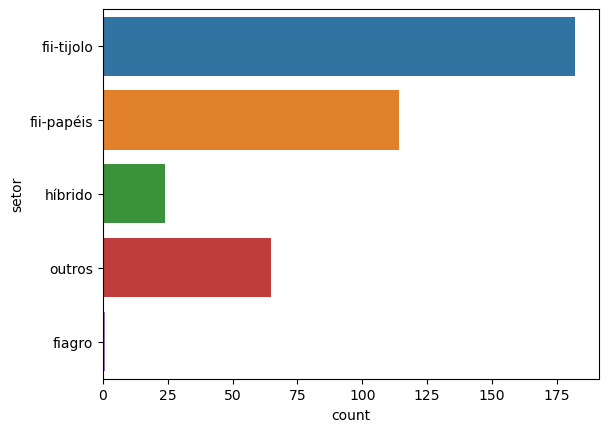

In [41]:
sns.countplot(data = fiis,
               y = 'setor');

Observa-se que a maioria dos fundos são de tijolo, pois este engloba uma quantidade grande de subsetores. 

Na análise seguinte, serão identificados os subsetores, assim veremos como se subdividem em quantidade.

<Axes: xlabel='count', ylabel='subsetor'>

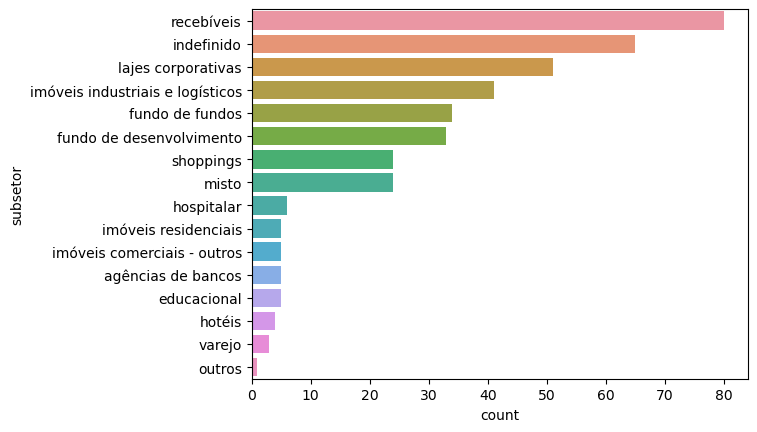

In [42]:
# Calcular a contagem de ativos em cada subsetor
subsetor_counts = fiis['subsetor'].value_counts()

# Obter a ordem dos subsetores com base na contagem de ativos
order_subsetor = subsetor_counts.index

sns.countplot(data = fiis,
               y = 'subsetor',
             order=order_subsetor)


## Correlação

Agora mostraremos os dados mais relevantes levantados via gráfico a fim de mostrar o comportamento entre as medidas 'dy', 'pvp', 'n_cotistas', 'quant_ativos' ,'preco', 'ifix', 'dy_patr'.


In [43]:
fiis.columns

Index(['dividendo_status', 'dy', 'pva_status', 'pvp', 'liquidez_diaria',
       'perc_caixa', 'cagr_div_3a', 'cagr_valor_3a', 'n_cotistas', 'gestao',
       'n_cotas_status', 'subsetor', 'liq_diaria_funds', 'ult_dividendo_funds',
       'dy_funds', 'dy_3m_acum', 'dy_6m_acum', 'dy_3m_media', 'dy_6m_media',
       'dy_12m_media', 'dy_ano_funds', 'var_preco', 'rentabilidade',
       'rentabilidade_acum', 'vpa_funds', 'pvpa_funds', 'dy_patr', 'var_patr',
       'rentab_patr', 'rentab_patr_acum', 'quant_ativos', 'volatilidade',
       'ifix', 'preco', 'patrimonio_milhoes', 'setor'],
      dtype='object')

<Axes: >

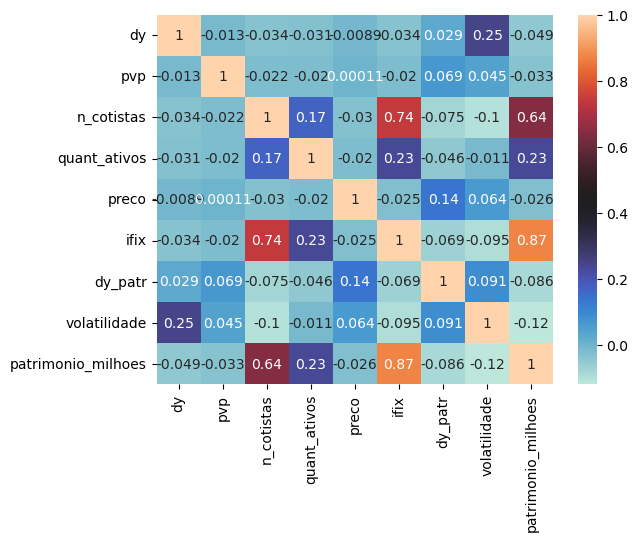

In [44]:
sns.heatmap(fiis[['dy','pvp','n_cotistas','quant_ativos','preco','ifix','dy_patr','volatilidade','patrimonio_milhoes']].corr(),
           cmap='icefire', annot=True)

Observa-se correlação forte entre os FII's componentes do IFIX, tanto com relação ao número de cotistas, quanto em relação ao seu Patrimônio Líquido.

Todos os demais apresentam pouca correlação ou quase nenhuma.

## Preço / Valor patrimonial

Agora vamos explorar os dados de PVP por subsetor retirando os outliers acima de 2 (na última análise, 7 dentre os Fundos extrapolam este limite).

### Identificando FIIs com distorção na coluna 'pvp'

In [45]:
print(f' Mediana dos PVPs: {fiis.pvp.median()}')
fiis[['subsetor', 'pvp', 'patrimonio_milhoes','pvpa_funds','pva_status','preco']].sort_values(by='pvp', 
                                                  ascending=False).head(10)

 Mediana dos PVPs: 0.9300000071525574


,subsetor,pvp,patrimonio_milhoes,pvpa_funds,pva_status,preco
ticker,,,,,,
SRVD11,indefinido,583.00,-0.83,2.53,-0.01,3.00
SFND11,NaN,29.35,2.78,NaN,2.83,83.07
RZDM11,NaN,16.77,5.25,NaN,32.81,550.16
IBFF11,fundo de fundos,4.49,9.86,4.49,14.78,66.40
RBRM11,fundo de desenvolvimento,3.63,14.09,NaN,26141.97,94794.81
LOFT11B,fundo de desenvolvimento,2.98,19.66,NaN,10.02,29.90
KINP11,fundo de desenvolvimento,2.66,26.41,2.66,0.00,9.82
BICR11,recebíveis,1.50,22.22,1.52,44.43,66.67
DOVL11B,NaN,1.47,54.14,NaN,815.25,1200.69


Observa-se que é importante avaliar se tem FII com valor distorcendo as estatísticas. Nesta análise, pelo menos 3 PVPs muito acima das medianas, os quais são chamados de outliers.

### Plotando o gráfico

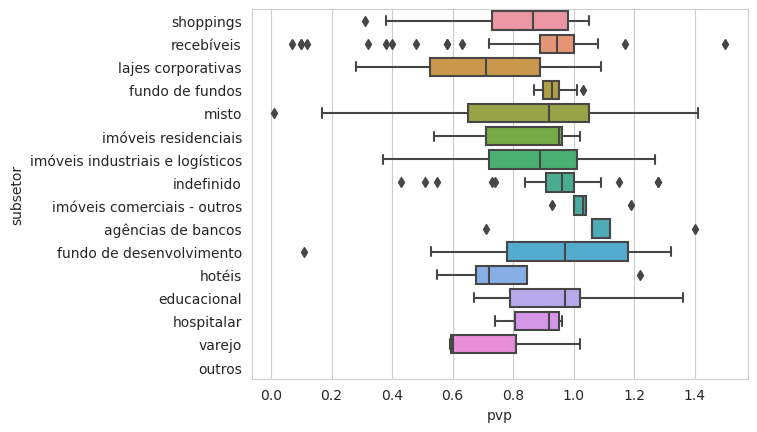

In [46]:
with sns.axes_style('whitegrid'):
    sns.boxplot(x = fiis['pvp'][fiis['pvp']<2],
                y = fiis['subsetor'])

PVP é um indicador referencial interessante para apontar se o valor de mercado está "barato" ou "caro" em relação ao último valor patrmonial avaliado dos ativos daquele FII.

Abaixo de 1 indica que há um desconto sobre o valor real, portanto, possui um upside.

Enquanto, se acima de 1 ele está sobreprecificado e tem pressão para voltar para 1.

Durante a pandemia, os FIIs de Tijolo estavam descontados e voltaram ao patamar mais próximo da referência 1,enquanto os de Papel decolaram com os altos índices de Inflação e expectativa de aumento da Taxa Básica de Juros (SELIC) para contê-los.

## Dividend Yield

Conforme o [artigo da Suno](https://www.suno.com.br/guias/dividend-yield/#:~:text=O%20significado%20de%20Dividend%20Yield,rela%C3%A7%C3%A3o%20%C3%A0s%20suas%20cota%C3%A7%C3%B5es%20atuais.), Dividendo yield é a relação entre  ou proventos a empresa pagou nos últimos 12 meses em relação ao preço de cotação de mercado.


Lembra-se que este dado é estático e que deve ser avaliado individualmente, por motivo de haver a possibilidade de um dividendo ser pago de forma extraordinária, amortização ou algum evento muito relevante do fundo.

Nesta tabela, mostra-se os 30 FIIs com maior Dividend Yield:

In [47]:
fiis[['subsetor','dy']].sort_values(by='dy', ascending=False).head(30)

,subsetor,dy
ticker,,
TCPF11,misto,1233.329956
BLMO11,lajes corporativas,1077.140015
VSEC11,recebíveis,285.709991
LATR11B,NaN,202.330002
NCHB11,recebíveis,124.290001
XPHT11,hotéis,116.810000
DPRO11,indefinido,96.830002
GESE11B,educacional,87.269997
KINP11,fundo de desenvolvimento,65.419998


Neste gráfico, a cereja do bolo, comparo os fundos imobiliários com a linha de referência, a SELIC (11,75%) em janeiro/2024, com os distribuição dos dados agrupados por subsetor.

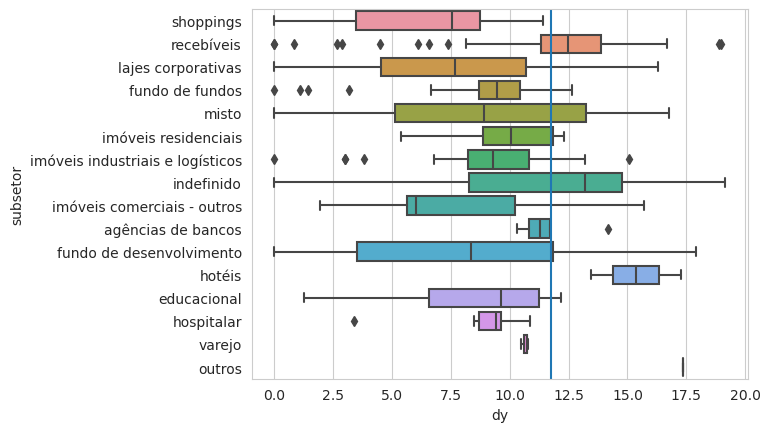

In [48]:
with sns.axes_style('whitegrid'):
    ax = sns.boxplot(x = fiis.dy[fiis['dy']<20],
                y = fiis['subsetor'])
    ax.axvline(x = 11.75)    # Line on x = 2
           

Rendimentos altos tendem a refletir ativos de maior risco, como recebíveis (risco de calote) e  de hotéis (alta sazonalidade e pelo panorama econômico nacional).

Mas novamente, ressalto que em um segundo momento, cada ativos devem ser analisado através de seus relatórios e/ou por relatório de casas de análise. 

## Patrimônio Líquido

Cnoforme este [artigo da Suno](https://www.suno.com.br/guias/patrimonio-liquido/):
> O patrimônio líquido é um indicador contábil que representa a diferença entre o ativo e o passivo da organização. Ou seja, o PL demonstra a subtração entre os bens e direitos que uma empresa possui em relação às suas obrigações.

Abaixo, revelo os 20 maiores FIIs em milhões de reais:

In [49]:
fiis[['subsetor','patrimonio_milhoes']].sort_values(by = 'patrimonio_milhoes', ascending = False).head(20)

,subsetor,patrimonio_milhoes
ticker,,
KNIP11,recebíveis,7937.90
PBLV11,NaN,6193.90
KNCR11,recebíveis,5759.45
HGLG11,imóveis industriais e logísticos,5346.52
KNRI11,misto,3836.94
XPML11,shoppings,3445.98
XPLG11,imóveis industriais e logísticos,3267.60
IRDM11,recebíveis,3183.35
HGBS11,shoppings,2947.19


Fitrando os FIIs com Patrimônio Líquido até R$ 2.500.000.000,00, observam-se as seguintes distribuições:

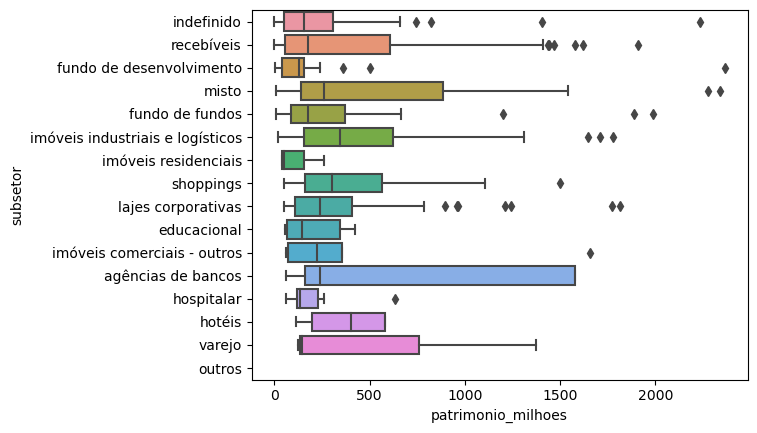

In [50]:
sns.boxplot(data = fiis.sort_values(by='patrimonio_milhoes'),
             y = 'subsetor',
             x = fiis['patrimonio_milhoes'][fiis.patrimonio_milhoes < 2500]);


Observa-se então a concentração dos FII's entre 200 e 500 milhões.

Quantidade de ativos por Valor Patrimonial

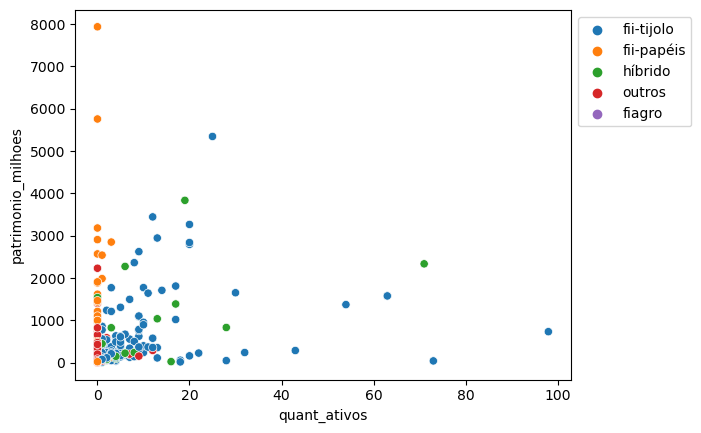

In [51]:
sns.scatterplot(x=fiis.quant_ativos,
           y=fiis.patrimonio_milhoes,
               hue=fiis.setor)
# Ajustando a posição da legenda
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Exibindo o gráfico
plt.show()

Esperava-se uma linha crescente, porém, observam-se que há fundos com uma quantidade grande de ativos e baixo valor patrimonial, ao passo que outros com pouquíssimos imóveis com valor patrimonial altíssimo.

Parte dos resultados são devidos ao fato de haver Fundos híbridos, com grande patrimônio alocado em recebíveis e poucos ativos de "tijolo", como observado abaixo no cálculo de média patrimonial por ativo.

In [52]:
fiis_media_patrimonio = fiis[['setor','subsetor','quant_ativos','patrimonio_milhoes']][fiis.quant_ativos > 1]
fiis_media_patrimonio['valor_patr_por_ativo'] = fiis.patrimonio_milhoes / fiis.quant_ativos
fiis_media_patrimonio.sort_values(by='valor_patr_por_ativo',ascending=False)

,setor,subsetor,quant_ativos,patrimonio_milhoes,valor_patr_por_ativo
ticker,,,,,
MXRF11,fii-papéis,recebíveis,3.0,2851.65,950.550000
BROF11,fii-tijolo,lajes corporativas,2.0,1239.74,619.870000
PVBI11,fii-tijolo,lajes corporativas,3.0,1772.91,590.970000
GTWR11,fii-tijolo,lajes corporativas,3.0,1213.09,404.363333
JSRE11,híbrido,misto,6.0,2275.87,379.311667
...,...,...,...,...,...
BNFS11,fii-tijolo,agências de bancos,18.0,60.22,3.345556
YUFI11,fii-tijolo,fundo de desenvolvimento,28.0,50.38,1.799286
LLAO11,híbrido,misto,16.0,26.70,1.668750


Observa-se curiosamente que os fundos de desenvolvimento despontam nos menores valores patrimoniais por quantidade de ativos.

Faremos nova análise analisando apenas os fundos de do setor Tijolo.

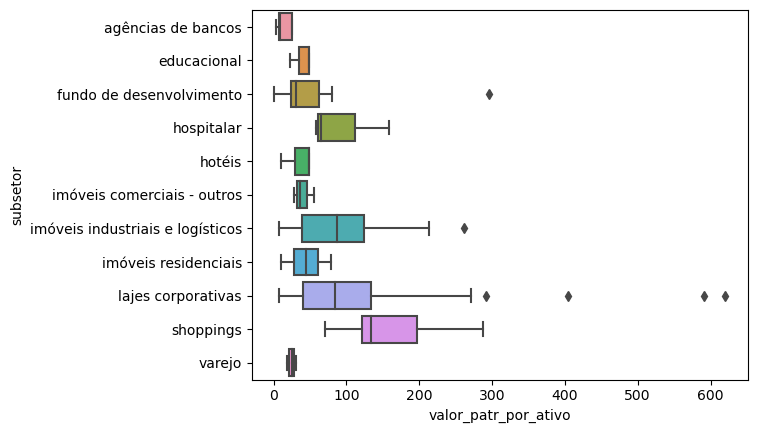

In [53]:
fiis_media_patrimonio = fiis_media_patrimonio[fiis_media_patrimonio.setor == "fii-tijolo"].sort_values(by='valor_patr_por_ativo',ascending=False)

# Calcular a contagem de ativos em cada subsetor
subsetor_median = fiis_media_patrimonio.groupby('subsetor')['valor_patr_por_ativo'].median()

# Obter a ordem dos subsetores com base na contagem de ativos
order_subsetor = subsetor_median.index

sns.boxplot(x=fiis_media_patrimonio.valor_patr_por_ativo,
           y=fiis_media_patrimonio.subsetor,
           order = order_subsetor)

plt.show()

Por fim temos o gráfico de distribuição dos valores patrimoniais por subsetor.
Temos que os Fundos de imóveis industriais e logísticos, de lajes corporativas e de shopping têm a maior variação de valor médio patrimonial por ativo.

Os shoppings têm maior mediana de valores patrimoniais, enquanto as agências bancárias têm a menor.

## Gráfico de dispersão comparando de PVP com DY
Foram utilizados os atributos:
- Eixo Y: PVP (ou P/VP, preço sobre valor patrimonial) é um indicador muito importante, sempre considerado ao avaliar um fundo imobiliário
- Eixo X: DY (dividend yield), o rendimento anualizado do fundo
- Cor: Subsetor
- Tamanho: Valor Patrimonial

O seguinte gráfico avalia a distribuição destes dados.

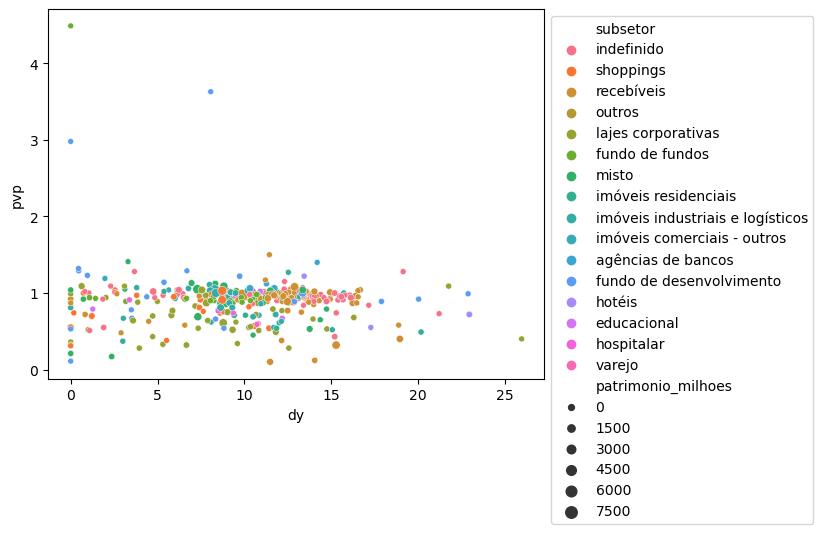

In [54]:
sns.scatterplot(x = fiis.dy[fiis.dy<30], 
                y=fiis.pvp[fiis.pvp<100], 
                size=fiis.patrimonio_milhoes, 
                hue=fiis.subsetor,
               legend='brief');
# Ajustando a posição da legenda
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Exibindo o gráfico
plt.show()

Como esperado, os fundos imobiliários circundam ao redor do valor 1 de P/VP e as maiores concentrações de DY entre 8 e 15%, inclusive os fundos mais volumosos.
Os demais que se afastam desta zona de concentração devem ser avaliados individualmente, pois podem ser distorções ou distribuições extraordinárias.

A fazer:
- colocar filtro de subsetores de fiis e todos para olhar individualmente
- exportar os dados para o sheets e ler num painel

# Dashboard

Para avaliação dinâmica individualmente de cada Fundo, foi disponibilizado o [Dashboard no Data Studio](https://lookerstudio.google.com/reporting/53730090-72ed-4b01-baa7-48b6536e3018).